<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

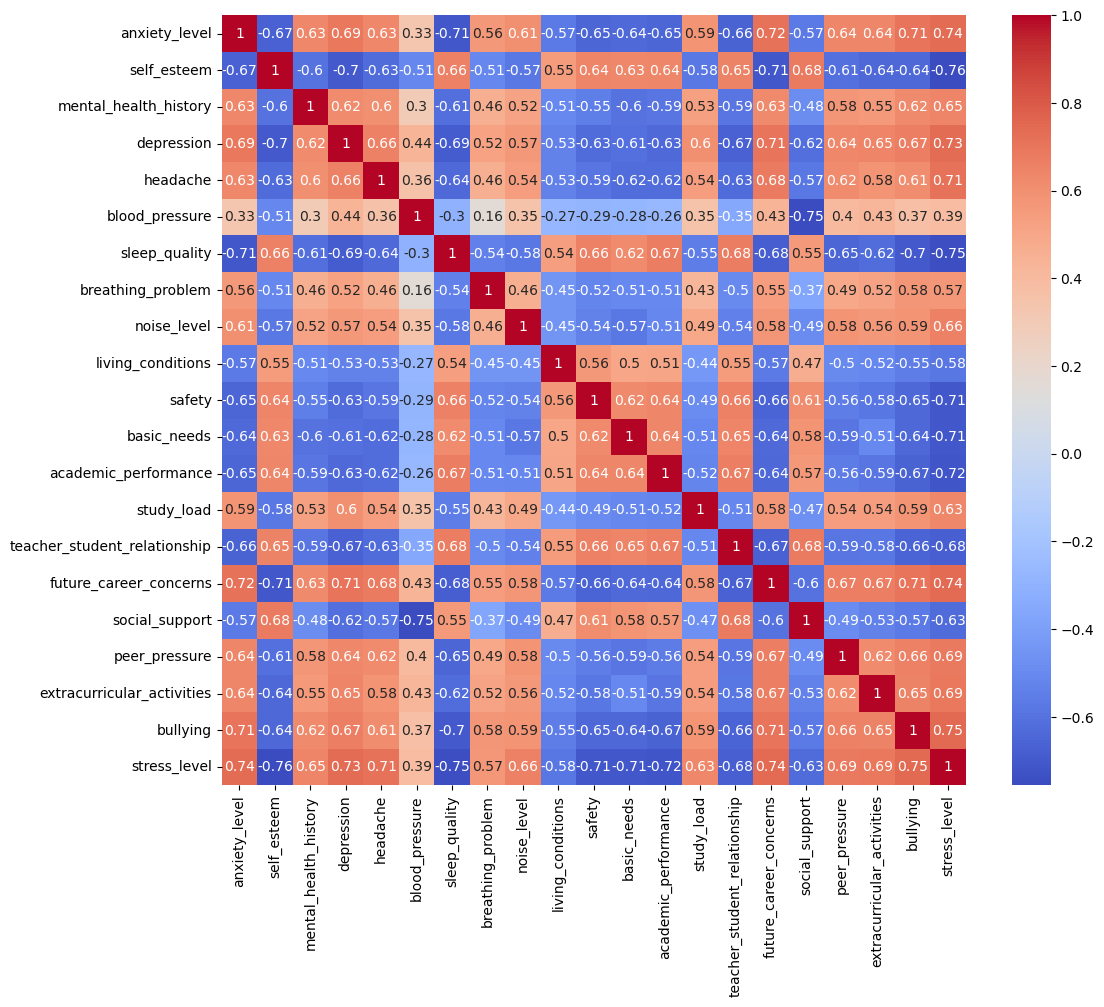

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv")
data.info();

corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

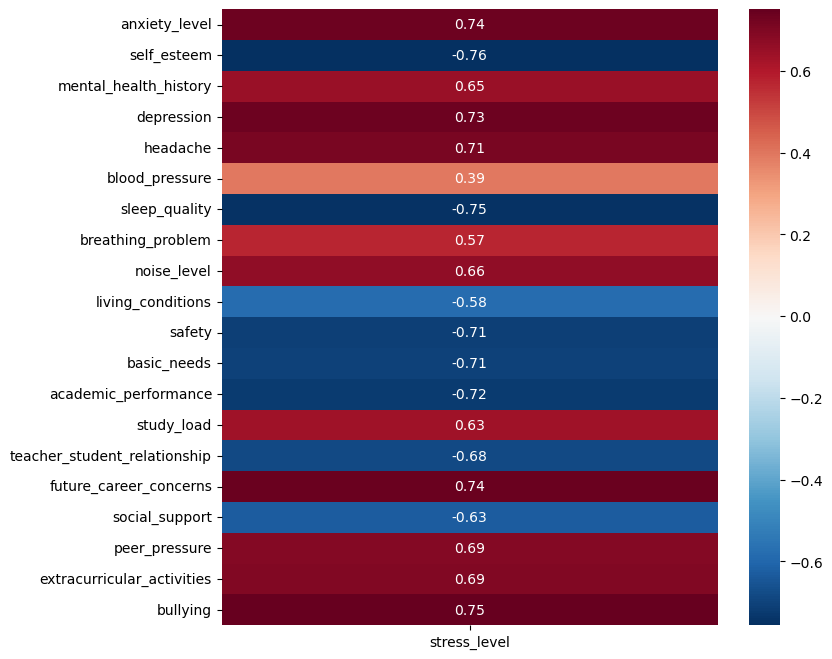

In [16]:
correl = data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correl.iloc[:-1,-1:], annot = True, cmap = "RdBu_r");

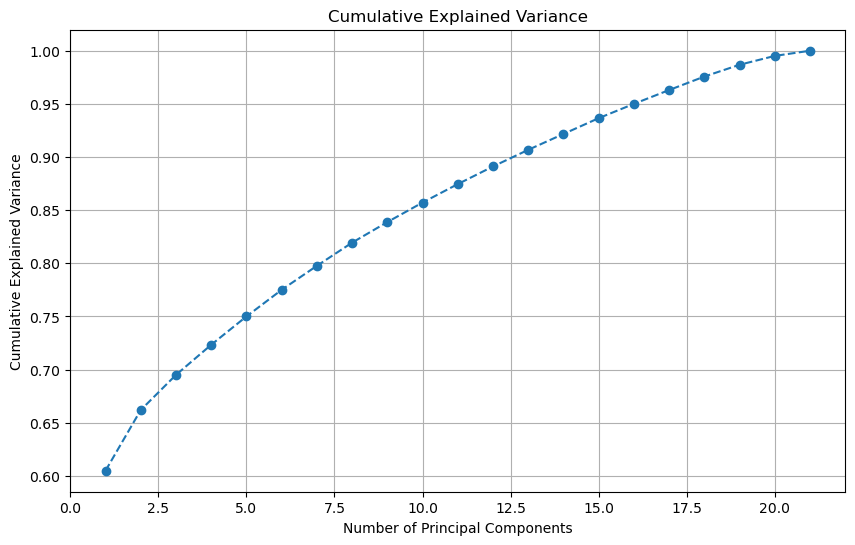

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Sélectionner les colonnes pertinentes pour l'analyse PCA
# Assurez-vous que seules les variables numériques sont incluses
columns_for_pca = df.select_dtypes(include=['float64', 'int64']).columns
data_for_pca = df[columns_for_pca]

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Appliquer l'analyse en composantes principales (PCA)
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


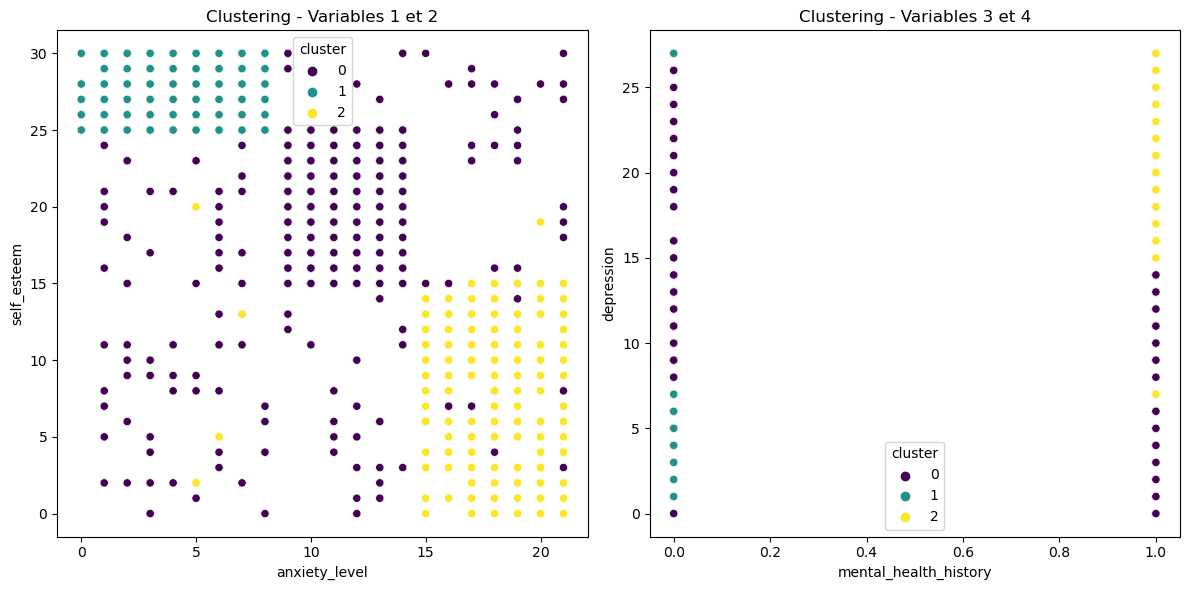

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Sélectionner les colonnes pertinentes pour le clustering
# Assurez-vous que seules les variables numériques sont incluses
columns_for_clustering = df.select_dtypes(include=['float64', 'int64']).columns
data_for_clustering = df[columns_for_clustering]

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Appliquer K-Means clustering avec un nombre arbitraire de clusters (k)
k = 3  # Choisissez le nombre de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# Visualiser les clusters
plt.figure(figsize=(12, 6))

# Visualisation pour la première paire de variables
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_for_clustering.columns[0], y=data_for_clustering.columns[1], hue='cluster', data=df, palette='viridis')
plt.title('Clustering - Variables 1 et 2')

# Visualisation pour la deuxième paire de variables
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_for_clustering.columns[2], y=data_for_clustering.columns[3], hue='cluster', data=df, palette='viridis')
plt.title('Clustering - Variables 3 et 4')

plt.tight_layout()
plt.show()


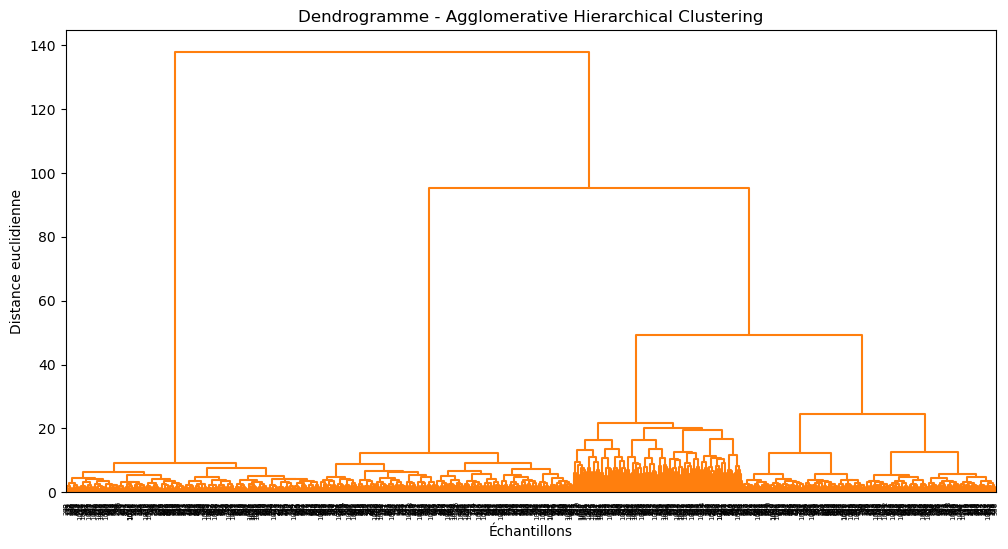

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np  # Ajoutez cette ligne pour importer NumPy

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Sélectionner les colonnes pertinentes pour le clustering
# Assurez-vous que seules les variables numériques sont incluses
columns_for_clustering = df.select_dtypes(include=['float64', 'int64']).columns
data_for_clustering = df[columns_for_clustering]

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Appliquer Agglomerative Hierarchical Clustering avec un nombre arbitraire de clusters
k = 3  # Choisissez le nombre de clusters
agg_clustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
df['cluster'] = agg_clustering.fit_predict(data_scaled)

# Visualiser les clusters à l'aide d'un dendrogramme
plt.figure(figsize=(12, 6))

# Créer une matrice de liaisons (linkage matrix)
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix, labels=df.index, orientation='top', color_threshold=np.inf)

plt.title('Dendrogramme - Agglomerative Hierarchical Clustering')
plt.xlabel('Échantillons')
plt.ylabel('Distance euclidienne')
plt.show()


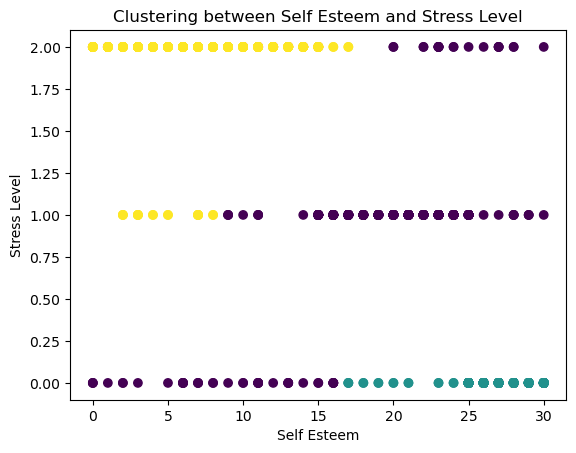

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Sélectionner les colonnes pertinentes pour le clustering
columns_for_clustering = ['self_esteem', 'stress_level']
data_for_clustering = df[columns_for_clustering]

# Standardiser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Appliquer K-Means clustering avec un nombre arbitraire de clusters (k)
k = 3  # Choisissez le nombre de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

# Visualiser les clusters
plt.scatter(df['self_esteem'], df['stress_level'], c=df['cluster'], cmap='viridis')
plt.xlabel('Self Esteem')
plt.ylabel('Stress Level')
plt.title('Clustering between Self Esteem and Stress Level')
plt.show()


Mean Squared Error: 0.26244767593482454
R-squared: 0.6069172979964255


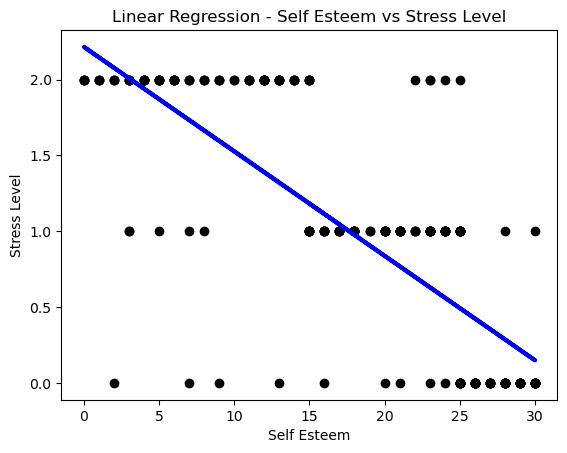

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Sélectionner les variables pour la régression linéaire simple
X = df[['self_esteem']]  # Variable indépendante
y = df['stress_level']    # Variable dépendante (cible)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Tracer la régression linéaire
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Self Esteem')
plt.ylabel('Stress Level')
plt.title('Linear Regression - Self Esteem vs Stress Level')
plt.show()


                          df      sum_sq     mean_sq            F  \
self_esteem              1.0  424.290291  424.290291  1885.574783   
academic_performance     1.0   70.849240   70.849240   314.858818   
Residual              1097.0  246.845924    0.225019          NaN   

                             PR(>F)  
self_esteem           1.663666e-240  
academic_performance   3.972215e-62  
Residual                        NaN  
mean           0   -18.713054
mean_se        0     0.872968
mean_ci_lower  0   -20.425930
mean_ci_upper  0   -17.000177
obs_ci_lower   0   -20.662479
obs_ci_upper   0   -16.763628
dtype: float64


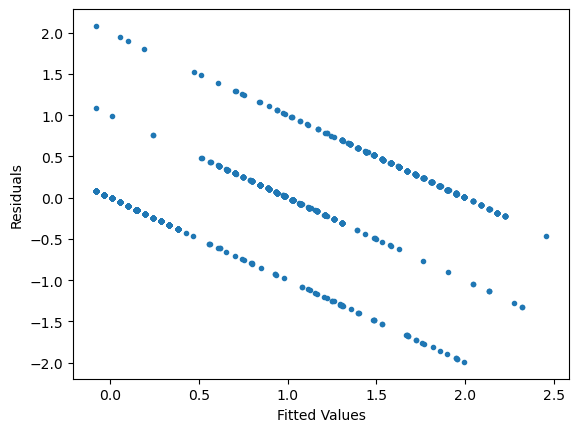

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Renommer les colonnes pour correspondre à votre jeu de données
df = df.rename(columns={'self_esteem': 'self_esteem', 'stress_level': 'stress_level', 'academic_performance': 'academic_performance'})

# Modèle de régression linéaire
model = ols("stress_level ~ self_esteem + academic_performance", data=df)
fit = model.fit()
table = sm.stats.anova_lm(fit)
print(table)

# Nouvelles données pour la prédiction
new_data = {'self_esteem': [80], 'academic_performance': [75]}  # Remplacez les valeurs par celles que vous souhaitez utiliser pour la prédiction

# Prédiction
pred = fit.get_prediction(new_data)
summary_frame = pred.summary_frame(alpha=0.05).unstack()
print(summary_frame)

# Tracé des résidus
plt.plot(fit.fittedvalues, fit.resid, '.')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


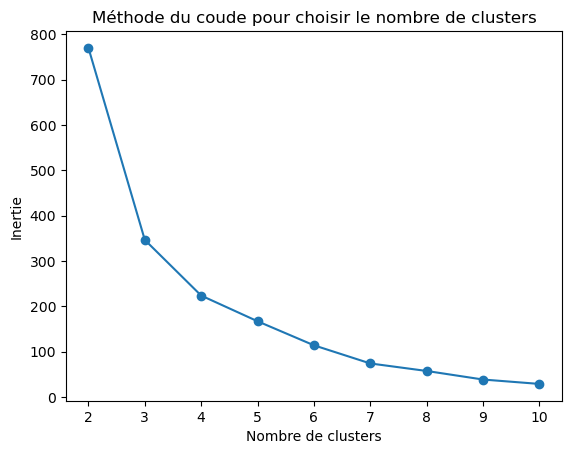

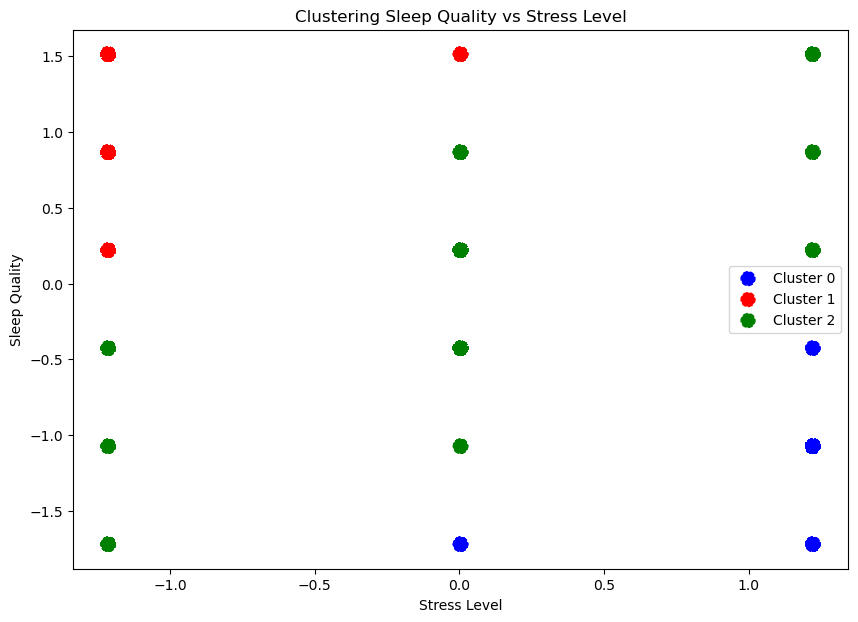

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Sélectionner les colonnes pertinentes pour le clustering
dfa = df[['sleep_quality', 'stress_level']]

# Standardiser les données
scaler = StandardScaler()
dfa_std = scaler.fit_transform(dfa.astype(float))

# Appliquer K-Means
cluster_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertie = []

for c in cluster_range:
    kmeans = KMeans(init='k-means++', n_clusters=c).fit(dfa_std)
    inertie.append(kmeans.inertia_)

# Dessiner les inerties calculées
plt.figure()
plt.plot(cluster_range, inertie, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour choisir le nombre de clusters')
plt.show()

# On choisit 3 clusters
kmeans = KMeans(n_clusters=3).fit(dfa_std)

# Affecter les clusters à la variable labels
labels = kmeans.labels_

# Créer un nouveau DataFrame avec les valeurs standardisées et les labels des clusters
new_dfa = pd.DataFrame(data=dfa_std, columns=['sleep_quality', 'stress_level'])
new_dfa['labels_kmeans'] = labels

# Visualiser les clusters en 2 dimensions
fig, ax = plt.subplots(figsize=[10, 7])
colors = ['blue', 'red', 'green']

for i in range(3):
    plt.scatter(new_dfa['stress_level'][new_dfa['labels_kmeans'] == i],
                new_dfa['sleep_quality'][new_dfa['labels_kmeans'] == i],
                color=colors[i], s=100, linestyle='--', label=f'Cluster {i}')

plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')
plt.title('Clustering Sleep Quality vs Stress Level')
plt.legend()
plt.show()


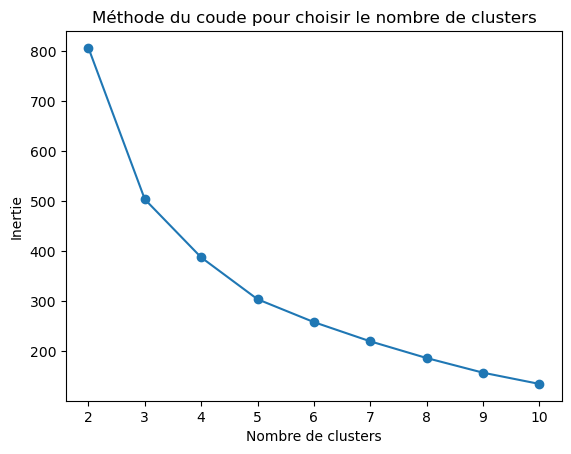

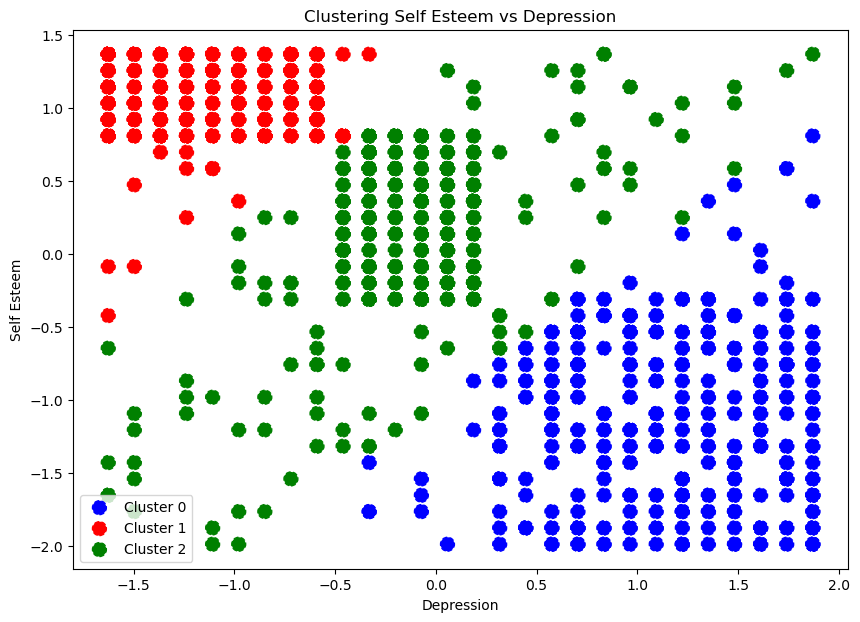

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Sélectionner les colonnes pertinentes pour le clustering
dfa = df[['self_esteem', 'depression']]

# Standardiser les données
scaler = StandardScaler()
dfa_std = scaler.fit_transform(dfa.astype(float))

# Appliquer K-Means
cluster_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertie = []

for c in cluster_range:
    kmeans = KMeans(init='k-means++', n_clusters=c).fit(dfa_std)
    inertie.append(kmeans.inertia_)

# Dessiner les inerties calculées
plt.figure()
plt.plot(cluster_range, inertie, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour choisir le nombre de clusters')
plt.show()

# On choisit 3 clusters
kmeans = KMeans(n_clusters=3).fit(dfa_std)

# Affecter les clusters à la variable labels
labels = kmeans.labels_

# Créer un nouveau DataFrame avec les valeurs standardisées et les labels des clusters
new_dfa = pd.DataFrame(data=dfa_std, columns=['self_esteem', 'depression'])
new_dfa['labels_kmeans'] = labels

# Visualiser les clusters en 2 dimensions
fig, ax = plt.subplots(figsize=[10, 7])
colors = ['blue', 'red', 'green']

for i in range(3):
    plt.scatter(new_dfa['depression'][new_dfa['labels_kmeans'] == i],
                new_dfa['self_esteem'][new_dfa['labels_kmeans'] == i],
                color=colors[i], s=100, linestyle='--', label=f'Cluster {i}')

plt.xlabel('Depression')
plt.ylabel('Self Esteem')
plt.title('Clustering Self Esteem vs Depression')
plt.legend()
plt.show()


In [25]:
pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


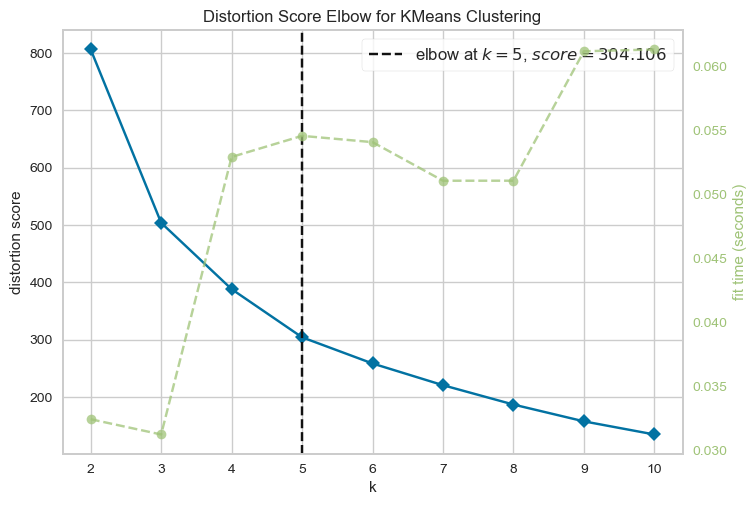

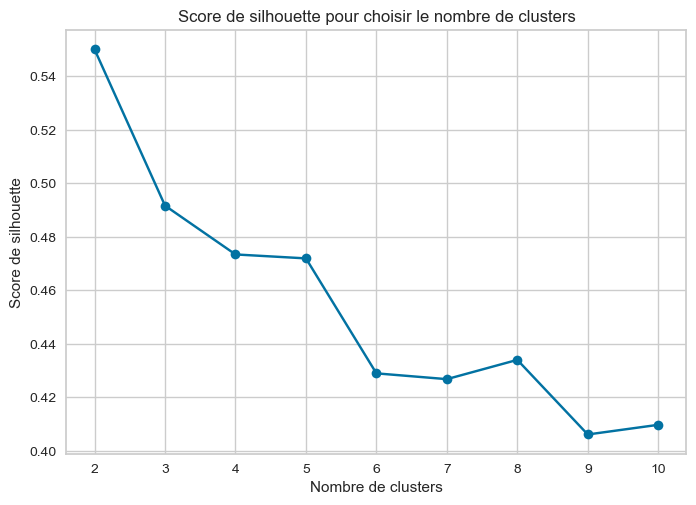

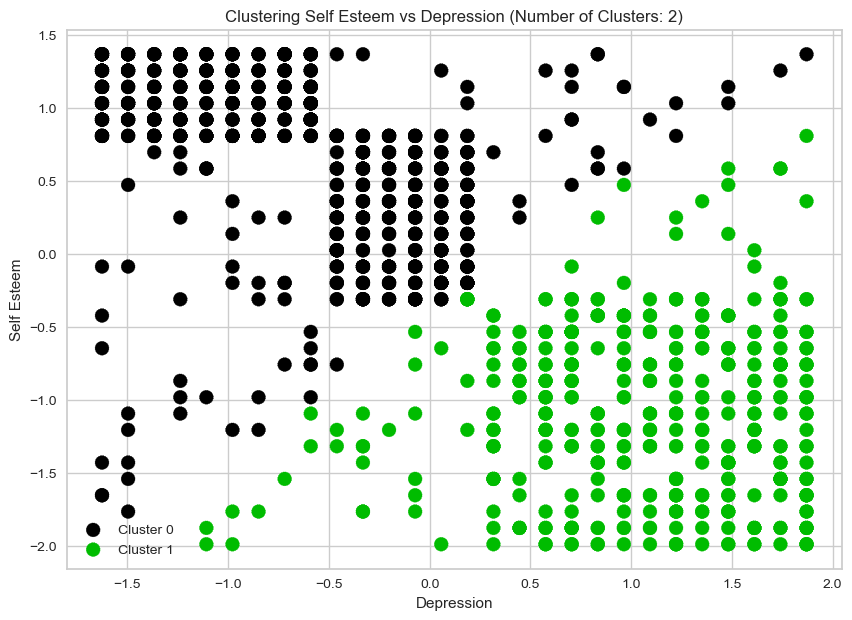

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Charger les données depuis le fichier CSV
file_path = "C:\\Users\\vivie\\Downloads\\StressLevelDataset.csv"
df = pd.read_csv(file_path)

# Sélectionner les colonnes pertinentes pour le clustering
dfa = df[['self_esteem', 'depression']]

# Standardiser les données
scaler = StandardScaler()
dfa_std = scaler.fit_transform(dfa.astype(float))

# Utiliser la méthode du coude (Elbow Method)
visualizer = KElbowVisualizer(KMeans(init='k-means++'), k=(2,11))
visualizer.fit(dfa_std)
visualizer.show()

# Utiliser la méthode de la silhouette pour un éventail de clusters
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(init='k-means++', n_clusters=n_clusters).fit(dfa_std)
    silhouette_scores.append(silhouette_score(dfa_std, kmeans.labels_))

# Dessiner les scores de silhouette
plt.figure()
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour choisir le nombre de clusters')
plt.show()

# On choisit le nombre de clusters avec le meilleur score de silhouette
best_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Appliquer K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=best_n_clusters).fit(dfa_std)

# Affecter les clusters à la variable labels
labels = kmeans.labels_

# Créer un nouveau DataFrame avec les valeurs standardisées et les labels des clusters
new_dfa = pd.DataFrame(data=dfa_std, columns=['self_esteem', 'depression'])
new_dfa['labels_kmeans'] = labels

# Visualiser les clusters en 2 dimensions
fig, ax = plt.subplots(figsize=[10, 7])
colors = plt.cm.nipy_spectral(labels.astype(float) / best_n_clusters)

for i in range(best_n_clusters):
    plt.scatter(new_dfa['depression'][new_dfa['labels_kmeans'] == i],
                new_dfa['self_esteem'][new_dfa['labels_kmeans'] == i],
                color=colors[i], s=100, linestyle='--', label=f'Cluster {i}')

plt.xlabel('Depression')
plt.ylabel('Self Esteem')
plt.title(f'Clustering Self Esteem vs Depression (Number of Clusters: {best_n_clusters})')
plt.legend()
plt.show()
